# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [29]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [30]:
# Read the Mapbox API key
load_dotenv()

MAPBOX_API_KEY = os.getenv('MAPBOX_API_KEY')

px.set_mapbox_access_token(MAPBOX_API_KEY)

## Load Data

In [31]:
# Read the census data into a Pandas DataFrame
file_path = Path('Data/toronto_neighbourhoods_census_data.csv')

toronto_data = pd.read_csv(file_path, index_col = 'year')

toronto_data.head(10)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [32]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
types_of_dwelling_initial = toronto_data.groupby('year').sum()

#Leaving unwanted info out
types_of_dwelling_final = types_of_dwelling_initial.drop(columns=['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'])

#Read
types_of_dwelling_final.head(4)

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [33]:
# Save the dataframe as a csv file
types_of_dwelling_final.to_csv('toronto_neighbourhoods_census_data_year.csv')

In [34]:
# Helper create_bar_chart function

dwelling_types_2001 = pd.DataFrame(types_of_dwelling_final.iloc[0,:])
dwelling_types_2001.rename(columns={2001:'dwelling_no'}, inplace=True)
dwelling_types_2006 = pd.DataFrame(types_of_dwelling_final.iloc[1,:])
dwelling_types_2006.rename(columns={2006:'dwelling_no'}, inplace=True)
dwelling_types_2011 = pd.DataFrame(types_of_dwelling_final.iloc[2,:])
dwelling_types_2011.rename(columns={2011:'dwelling_no'}, inplace=True)
dwelling_types_2016 = pd.DataFrame(types_of_dwelling_final.iloc[3,:])
dwelling_types_2016.rename(columns={2016:'dwelling_no'}, inplace=True)


# Def the Bar Chart
def create_bar_chart(data, title, xlabel, ylabel, color):
    plt.bar(x=data.index, height = data.dwelling_no, color=color, width = 0.6)
    plt.title(title,fontweight = 'bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)


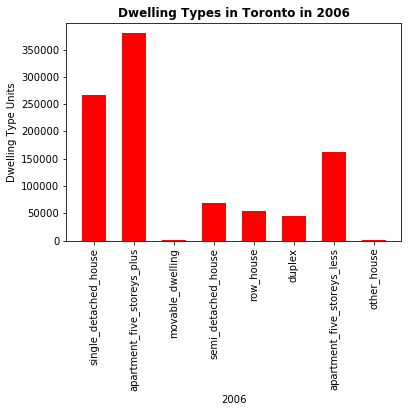

In [35]:
# Bar chart for 2006
create_bar_chart(dwelling_types_2006, 'Dwelling Types in Toronto in 2006', '2006', 'Dwelling Type Units', 'red')

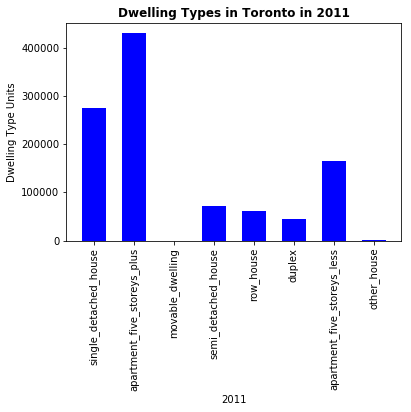

In [36]:
# Bar chart for 2011
create_bar_chart(dwelling_types_2011, 'Dwelling Types in Toronto in 2011', '2011', 'Dwelling Type Units', 'blue')

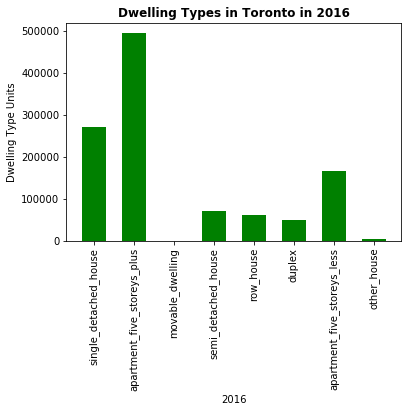

In [37]:
# Bar chart for 2016
create_bar_chart(dwelling_types_2016, 'Dwelling Types in Toronto in 2016', '2016', 'Dwelling Type Units', 'green')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [38]:
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_cost = toronto_data[['shelter_costs_owned', 'shelter_costs_rented']].groupby(toronto_data.index).mean()

avg_cost.head(4)

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [39]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    plt.plot(data, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

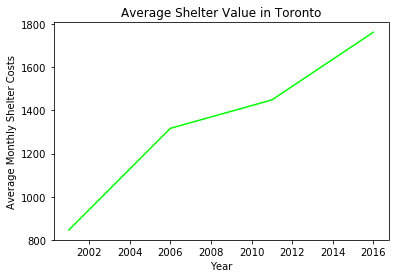

In [40]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(avg_cost['shelter_costs_owned'],'Average Shelter Value in Toronto', 'Year', 'Average Monthly Shelter Costs', 'lime')

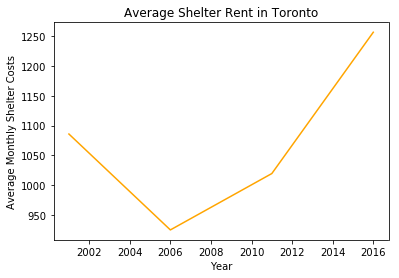

In [41]:
# Line chart for rented dwellings
create_line_chart(avg_cost['shelter_costs_rented'],'Average Shelter Rent in Toronto', 'Year', 'Average Monthly Shelter Costs', 'orange')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [42]:
# Calculate the average house value per year
avg_shelter_value = toronto_data[['average_house_value']].groupby(["year"]).mean()

avg_shelter_value

,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


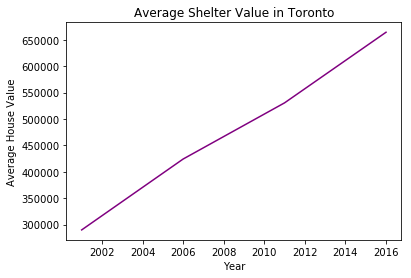

In [43]:
# Plot the average house value per year as a line chart
create_line_chart(avg_shelter_value, 'Average Shelter Value in Toronto', 'Year', 'Average House Value', 'Purple')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [44]:
# Create a new DataFrame with the mean house values by neighbourhood per year
neighbourhood = toronto_data[['average_house_value', 'neighbourhood']].groupby(['neighbourhood', 'year']).mean()

# Read neighbourhood data
neighbourhood.head(10)

average_house_value
neighbourhood                year                     
Agincourt North              2001               200388
                             2006               293140
                             2011               366667
                             2016               459051
Agincourt South-Malvern West 2001               203047
                             2006               297031
                             2011               371534
                             2016               465144
Alderwood                    2001               259998
                             2006               380342

In [45]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
neighbourhood.hvplot(x = 'year', y = 'average_house_value', groupby = 'neighbourhood', yformatter = '%.0f').opts(height = 500, fontsize = {'title':15, 'ylabel':15, 'xlabel':15}, xlabel = 'Year', ylabel = 'Average Dwelling Value', color = 'teal')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [46]:
# Fetch the data of all dwelling types per year
no_types = toronto_data.drop(columns = ['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented']).groupby(['neighbourhood', 'year']).mean()

no_types.head(10)

single_detached_house  \
neighbourhood                year                          
Agincourt North              2001                   3715   
                             2006                   3295   
                             2011                   3385   
                             2016                   3345   
Agincourt South-Malvern West 2001                   3250   
                             2006                   2695   
                             2011                   2855   
                             2016                   2790   
Alderwood                    2001                   3175   
                             2006                   2750   

                                   apartment_five_storeys_plus  \
neighbourhood                year                                
Agincourt North              2001                         1480   
                             2006                         2060   
                             2011                         2130   
                             2016                         2120   
Agincourt South-Malvern West 2001                         1835   
                             2006                         1840   
                             2011                         1900   
                             2016                         3145   
Alderwood                    2001                          315   
                             2006                          315   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                year                                          
Agincourt North              2001                 0                 1055   
                             2006                 0                  775   
                             2011                 5                  820   
                             2016                 5                  805   
Agincourt South-Malvern West 2001                 0                  545   
                             2006                 5                  305   
                             2011                 0                  320   
                             2016                 0                  330   
Alderwood                    2001                 0                  470   
                             2006                 5                  480   

                                   row_house  duplex  \
neighbourhood                year                      
Agincourt North              2001       1295     195   
                             2006       1425     600   
                             2011       1465     610   
                             2016       1440     645   
Agincourt South-Malvern West 2001        455     105   
                             2006        420     610   
                             2011        435     685   
                             2016        515     695   
Alderwood                    2001         50     185   
                             2006         85     370   

                                   apartment_five_storeys_less  other_house  
neighbourhood                year                                            
Agincourt North              2001                          185            5  
                             2006                          565            0  
                             2011                          705           20  
                             2016                          735           15  
Agincourt South-Malvern West 2001                          425            0  
                             2006                          860            5  
                             2011                          620           60  
                             2016                          610           65  
Alderwood                    2001                          370            0  
                             2006                          540            5

In [47]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
columns = ['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']

no_types.hvplot.bar(x = 'year', y = columns, rot = 90, groupby = 'neighbourhood').opts(height = 500, width = 800, fontsize = {'title':15, 'ylabel':15, 'xlabel':15}, xlabel = 'Year/Type of Dwelling', ylabel = 'Dwelling Type Units')


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [48]:
# Getting the data from the top 10 expensive neighbourhoods
expensive = toronto_data[['neighbourhood','single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','average_house_value','shelter_costs_owned','shelter_costs_rented']].groupby('neighbourhood').mean().sort_values(by = 'average_house_value',ascending=False)

expensive = expensive[:10]

expensive.reset_index(inplace=True)

expensive.head(10)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
1,Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
2,Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
3,Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
4,St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
5,Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
6,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
7,Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
8,Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00
9,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.5,1308.75,6.25,813220.25,1680.75,1369.00


In [49]:
# Plotting the data from the top 10 expensive neighbourhoods
expensive.hvplot.bar(x ='neighbourhood', y = 'average_house_value', rot = 90, height = 500,title = 'Top 10 Most Expensive Neighbourhoods in Toronto', xlabel = 'Neighbourhood', ylabel = 'Average Dwelling Value')

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [50]:
# Load neighbourhoods coordinates data
file_path = Path('Data/toronto_neighbourhoods_coordinates.csv')

df_neighbourhood_locations = pd.read_csv(file_path)

df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [51]:
# Calculate the mean values for each neighborhood
mean =  toronto_data[['neighbourhood','single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','average_house_value','shelter_costs_owned','shelter_costs_rented']].groupby('neighbourhood').mean().reset_index()

mean.head(10)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
5,Bathurst Manor,2131.25,1815.00,0.00,151.25,70.00,677.50,973.75,8.75,501576.75,1307.00,1059.50
6,Bay Street Corridor,3.75,10470.00,0.00,1.25,18.75,1.25,271.25,2.50,423653.50,1494.50,1436.75
7,Bayview Village,2101.25,3222.50,2.50,141.25,830.00,70.00,500.00,2.50,539258.75,1512.75,1422.00
8,Bayview Woods-Steeles,1585.00,1700.00,0.00,580.00,175.00,86.25,522.50,1.25,565413.50,1364.25,1399.50
9,Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.50,1275.00,88.75,930415.25,1786.75,1255.00


In [52]:
# Join the average values with the neighbourhood locations
joined_df = pd.concat([df_neighbourhood_locations.set_index('neighbourhood'),mean.set_index('neighbourhood')], axis = 1, join = 'inner').reset_index()

joined_df.head(10)

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
5,Bathurst Manor,43.764813,-79.456055,2131.25,1815.00,0.00,151.25,70.00,677.50,973.75,8.75,501576.75,1307.00,1059.50
6,Bay Street Corridor,43.657511,-79.385721,3.75,10470.00,0.00,1.25,18.75,1.25,271.25,2.50,423653.50,1494.50,1436.75
7,Bayview Village,43.776361,-79.377117,2101.25,3222.50,2.50,141.25,830.00,70.00,500.00,2.50,539258.75,1512.75,1422.00
8,Bayview Woods-Steeles,43.796802,-79.382118,1585.00,1700.00,0.00,580.00,175.00,86.25,522.50,1.25,565413.50,1364.25,1399.50
9,Bedford Park-Nortown,43.731486,-79.420227,4865.00,1981.25,0.00,43.75,57.50,287.50,1275.00,88.75,930415.25,1786.75,1255.00


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

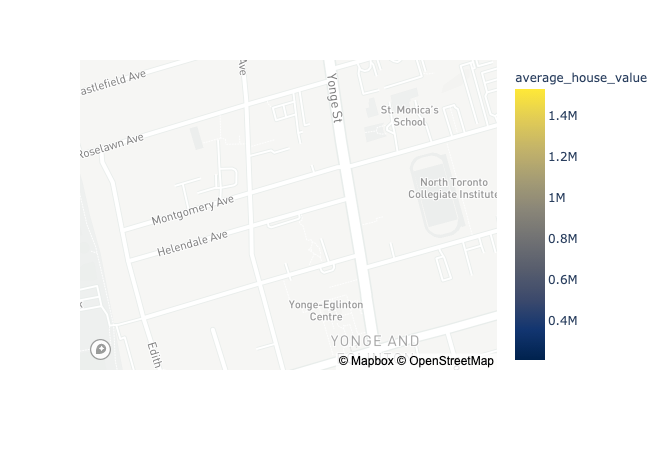

In [53]:
# Create a scatter mapbox to analyze neighbourhood info
scatter = px.scatter_mapbox(
    joined_df,    
    lat="lat",
    lon="lon",
    color="average_house_value",
    size="average_house_value",
    color_continuous_scale=px.colors.sequential.Cividis,
    zoom = 15
)

scatter.show()


- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [54]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [27]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [28]:
# Create the sunburst chart
# YOUR CODE HERE!